# Shampoo Sales Dataset

This dataset describes the monthly number of sales of shampoo over a 3 year period.

The units are a sales count and there are 36 observations.

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import warnings
warnings.filterwarnings('ignore')

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Reading Data

In [3]:
df = pd.read_csv("/content/sales-of-shampoo-over-a-three-ye.csv")
df.head()

,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3


In [4]:
df.tail()

,Month,Sales of shampoo over a three year period
31,3-Aug,407.6
32,3-Sep,682.0
33,3-Oct,475.3
34,3-Nov,581.3
35,3-Dec,646.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Month                                      36 non-null     object 
 1   Sales of shampoo over a three year period  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


Data refers from Jan 2001 to Dec 2003. It’s a monthly sales data. Creating monthly dates for timestamp from Jan 2001 to Dec 2003.



# Checking for missing values

In [6]:
df.isnull().sum()

Month                                        0
Sales of shampoo over a three year period    0
dtype: int64

# Statistical Description

In [7]:
round(df.describe(),2)

,Sales of shampoo over a three year period
count,36.00
mean,312.60
std,148.94
min,119.30
25%,192.45
50%,280.15
75%,411.10
max,682.00




*   Sales of shampoo ranges from 119.3 unit to 682 unit, hinting huge variation in sales across months.


*   Mean sales is 312.6



# Converting Date to Datetime Format

In [8]:
def parse_date(x):
    return datetime.strptime('200'+x, '%Y-%b')

In [9]:
df = pd.read_csv("/content/sales-of-shampoo-over-a-three-ye.csv",index_col=[0], parse_dates=[0], date_parser=parse_date)
df.head()

,Sales of shampoo over a three year period
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


In [10]:
df.tail()

,Sales of shampoo over a three year period
Month,
2003-08-01,407.6
2003-09-01,682.0
2003-10-01,475.3
2003-11-01,581.3
2003-12-01,646.9


**Rename the Column**

In [11]:
df.rename(columns={'Sales of shampoo over a three year period': 'Sales'}, inplace=True)

In [12]:
df.head()

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


In [13]:
df.tail()

,Sales
Month,
2003-08-01,407.6
2003-09-01,682.0
2003-10-01,475.3
2003-11-01,581.3
2003-12-01,646.9


# To Analyse Trend, Seasonality in Data

<Axes: xlabel='Month'>

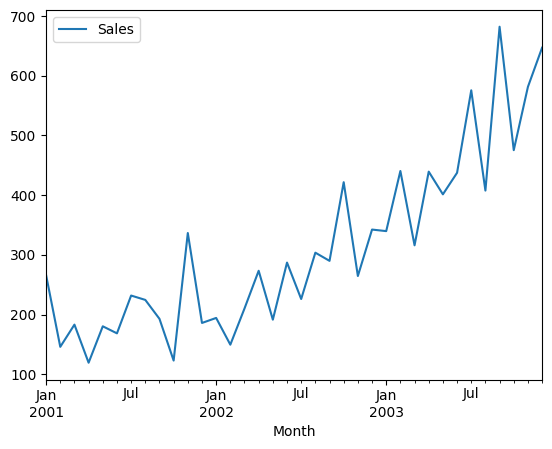

In [14]:
df.plot()

There seems to be a trend (increasing) with a seasonality as well.

The seasonal_decompose() function returns a result object which contains arrays to access four pieces of data from the decomposition.

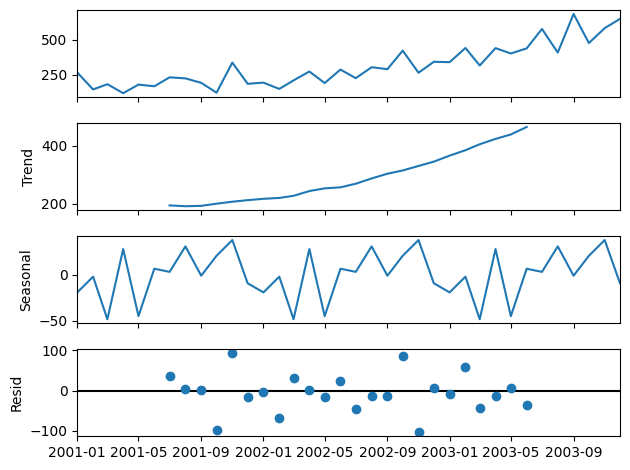

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
import  statsmodels.api as sm
df = sm.tsa.seasonal_decompose(df, model="additive")
df.plot()
plt.show()

I can observe the trend and seasonality are clearly separated.

In [15]:
df1 = df.copy()

**Seasonal Decompose**

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

**Additive Decomposition**



*   An additive model suggests that the components are added together.

*   An additive model is linear where changes over time are consistently made by the same amount.

*   A linear seasonality has the same frequency (width of the cycles) and amplitude (height of the cycles).





In [17]:
decom = seasonal_decompose(df, model='additive')

In [18]:
actual = decom.observed
trend = decom.trend
seasonal = decom.seasonal
residual = decom.resid

**Visualising Seasonal Decompose**

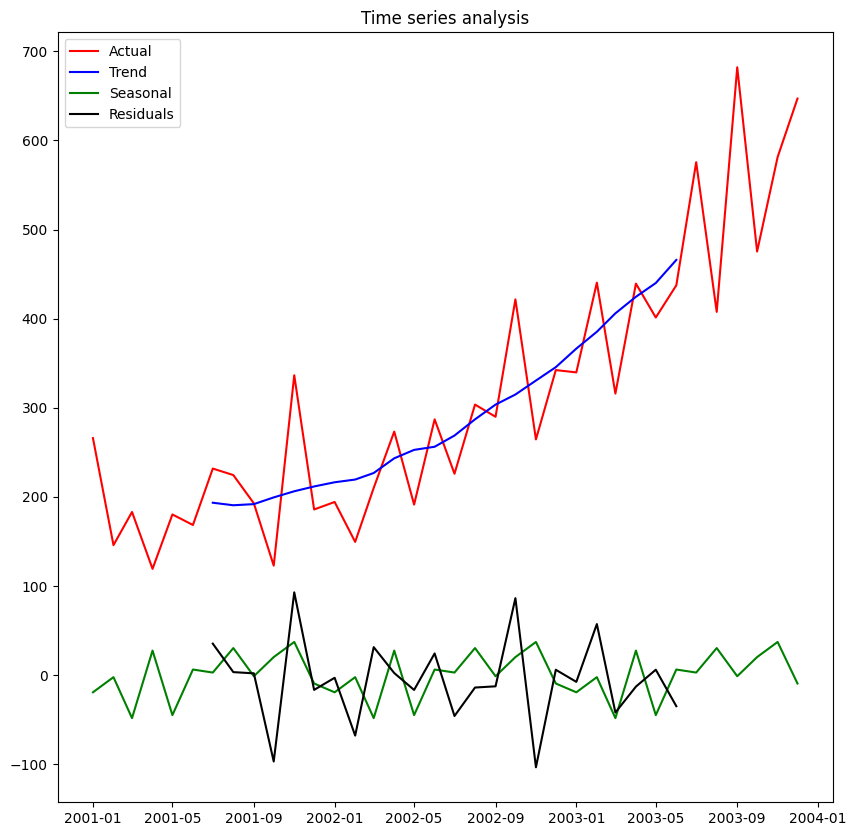

In [19]:
plt.figure(figsize=(10,10))
plt.plot(actual,color='red',label='Actual')
plt.plot(trend,color='blue', label='Trend')
plt.plot(seasonal,color='green', label='Seasonal')
plt.plot(residual, color='black', label='Residuals')
plt.legend()
plt.title("Time series analysis")
plt.show()

I can observe the trend and seasonality are clearly separated and scale of noise is small.

In the additive model, there are outliers present in the residual.

**Statistical Test to Check Stationarity**

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
# H0(Null Hypothesis) - Data is not stationary
# H1(Alternate Hypothesis) - Data is stationary

def adf_test(data):
    res = adfuller(data)
    print("RES : ",res)
    print("test_stat : ",res[0])
    print("p_val : ",res[1])
    if res[1]>0.05:
        print("H0 is accepted - data is not stationary")
    else:
        print("H1 is accepted - data is stationary")

In [22]:
adf_test(df1)

RES :  (3.060142083641181, 1.0, 10, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}, 278.99726442630316)
test_stat :  3.060142083641181
p_val :  1.0
H0 is accepted - data is not stationary


# Method to Reduce Stationarity

1.Differencing

2.Log Differencing

3.Sqrt

4.Square or Cube, Log etc

In [23]:
df1['lag1'] = df1['Sales'].shift(1)
df1['lag2'] = df1['Sales'].shift(2)
df1['Diff1'] = df1['Sales'].diff(1)
df1['Diff2'] = df1['Sales'].diff(2)
df1.head(10)

,Sales,lag1,lag2,Diff1,Diff2
Month,,,,,
2001-01-01,266.0,NaN,NaN,NaN,NaN
2001-02-01,145.9,266.0,NaN,-120.1,NaN
2001-03-01,183.1,145.9,266.0,37.2,-82.9
2001-04-01,119.3,183.1,145.9,-63.8,-26.6
2001-05-01,180.3,119.3,183.1,61.0,-2.8
2001-06-01,168.5,180.3,119.3,-11.8,49.2
2001-07-01,231.8,168.5,180.3,63.3,51.5
2001-08-01,224.5,231.8,168.5,-7.3,56.0
2001-09-01,192.8,224.5,231.8,-31.7,-39.0


In [24]:
# order of differencing = 1
adf_test(df['Sales'].diff(1).dropna())

RES :  (-7.249074055553854, 1.7998574141687034e-10, 1, 33, {'1%': -3.6461350877925254, '5%': -2.954126991123355, '10%': -2.6159676124885216}, 275.32503579406307)
test_stat :  -7.249074055553854
p_val :  1.7998574141687034e-10
H1 is accepted - data is stationary


In [25]:
adf_test(np.log(df['Sales']))

RES :  (1.798463299383079, 0.9983459643719065, 10, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}, -20.938048906258615)
test_stat :  1.798463299383079
p_val :  0.9983459643719065
H0 is accepted - data is not stationary


In [26]:
adf_test(np.sqrt(df['Sales']))

RES :  (2.5804123807554844, 0.9990712745555809, 10, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}, 94.84111839626257)
test_stat :  2.5804123807554844
p_val :  0.9990712745555809
H0 is accepted - data is not stationary


In [27]:
adf_test((df['Sales'])**(1/3))

RES :  (2.366713028204523, 0.9989937736689773, 10, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}, 24.574205249048028)
test_stat :  2.366713028204523
p_val :  0.9989937736689773
H0 is accepted - data is not stationary


**Ploting acf and pacf to Get p and q Value**

Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) can provide valuable insights into the behaviour of time series data.
They are often used to decide the number of Autoregressive (AR) means p and Moving Average (MA) means q lags and d is the degree of differencing for the ARIMA models.

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

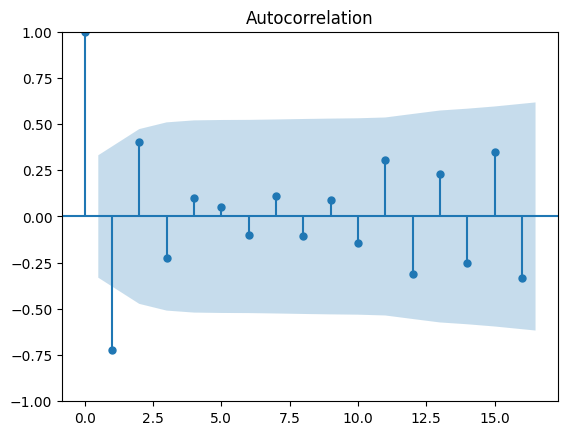

In [29]:
plot_acf(df['Sales'].diff(1).dropna())
plt.show()

# q = 1

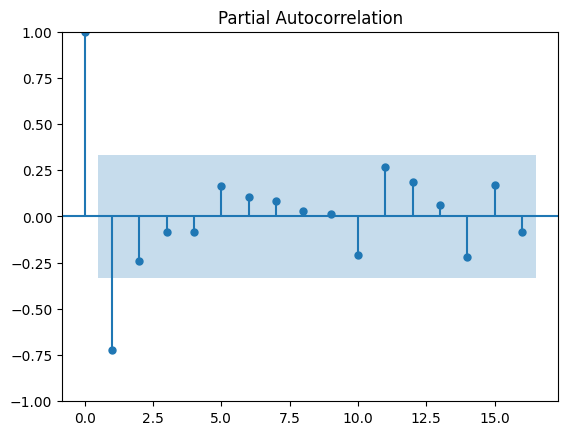

In [30]:
plot_pacf(df['Sales'].diff(1).dropna())
plt.show()

# p = 1

**Inference**

p=1, q=1, d=1

In [31]:
df.tail()

,Sales
Month,
2003-08-01,407.6
2003-09-01,682.0
2003-10-01,475.3
2003-11-01,581.3
2003-12-01,646.9


In [32]:
print(df.shape)
df.head()

(36, 1)


,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


# Splitting the Data into Training and Testing


Train first 28 rows and other are used in testing means remaining 8 rows.

In [33]:
train = df.iloc[:28,:]
test = df.iloc[28:,:]
print(train.shape)
print(test.shape)

(28, 1)
(8, 1)


In [34]:
train.tail()

,Sales
Month,
2002-12-01,342.3
2003-01-01,339.7
2003-02-01,440.4
2003-03-01,315.9
2003-04-01,439.3


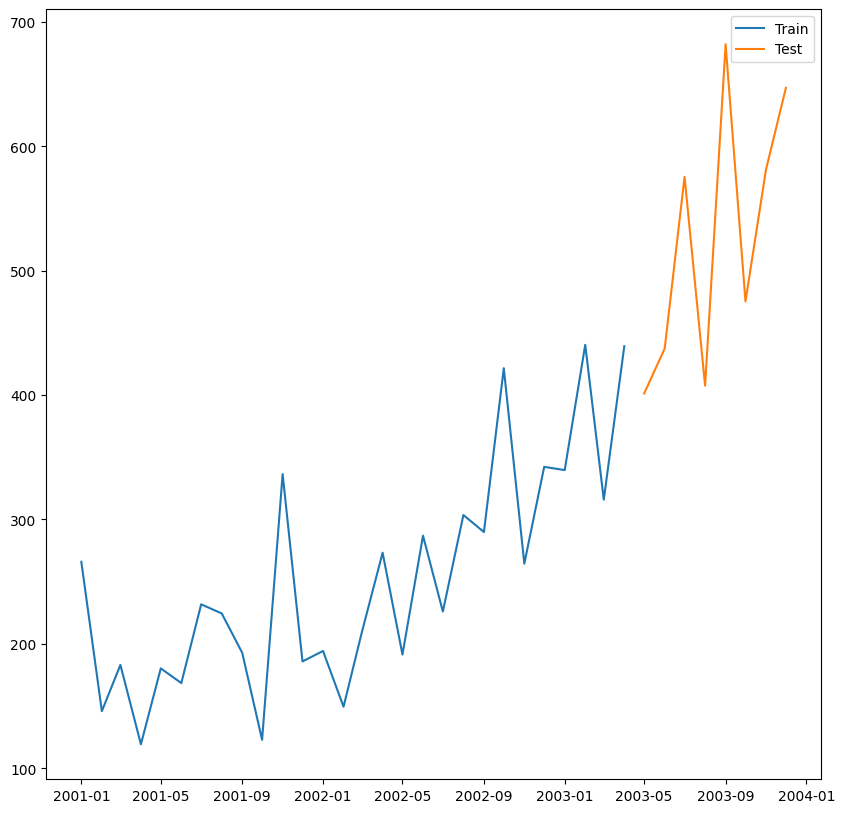

In [35]:
plt.figure(figsize=(10,10))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.legend()
plt.show()

In [36]:
def plot_res(train,test,pred):
    plt.figure(figsize=(10,10))
    plt.plot(train, label="Train")
    plt.plot(test, label="Test")
    plt.plot(pred, label="Forecast")
    plt.legend()
    plt.show()

# Implementing ARIMA Model

In [37]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [38]:
def eval_model(test, pred):
    mse = mean_squared_error(test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test,pred)
    print("MSE : ",mse)
    print("RMSE : ",rmse)
    print("MAE : ",mae)

# ARIMA(p=1,d=0,q=0) - AR Model

Choose ARIMA model values i.e p=1,d=0 and q=0

and fit the ARIMA model

In [39]:
#  order = (p,d,q)
m1 = ARIMA(train, order=(1,0,0))
ar_m1 = m1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [40]:
print(test.shape)

(8, 1)


Forecast the tesing data i.e remaining 8 rows

In [41]:
fcast_m1 = ar_m1.forecast(8)
fcast_m1

2003-05-01    344.155455
2003-06-01    298.890023
2003-07-01    277.354797
2003-08-01    267.109319
2003-09-01    262.234988
2003-10-01    259.916004
2003-11-01    258.812737
2003-12-01    258.287853
Freq: MS, Name: predicted_mean, dtype: float64

In [42]:
print("ARIMA(1,0,0) model : \n")
eval_model(test,fcast_m1)

ARIMA(1,0,0) model : 

MSE :  76086.13416737234
RMSE :  275.83715153577907
MAE :  247.56735310637328


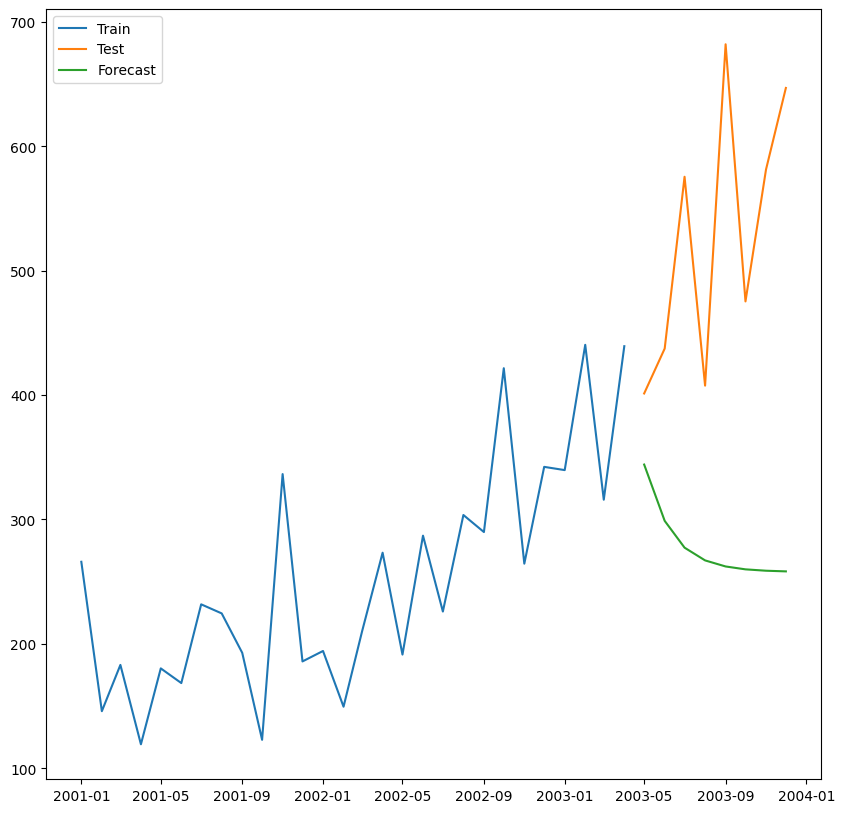

In [43]:
plot_res(train,test,fcast_m1)

# Custom ARIMA

In [44]:
def adj_arima(p,d,q):
    model = ARIMA(train,order=(p,d,q))
    arima = model.fit()
    fcast = arima.forecast(len(test))
    print("Forcasted values : \n",fcast)
    print(f"ARIMA({p,d,q})")
    eval_model(test,fcast) # MSE, RMSE, MAE
    plot_res(train,test,fcast)

# ARIMA(1, 1, 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    357.166160
2003-06-01    398.277184
2003-07-01    377.699596
2003-08-01    387.999440
2003-09-01    382.843987
2003-10-01    385.424482
2003-11-01    384.132849
2003-12-01    384.779359
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 1, 1))
MSE :  31017.70213095809
RMSE :  176.1184321158864
MAE :  143.62211792796188


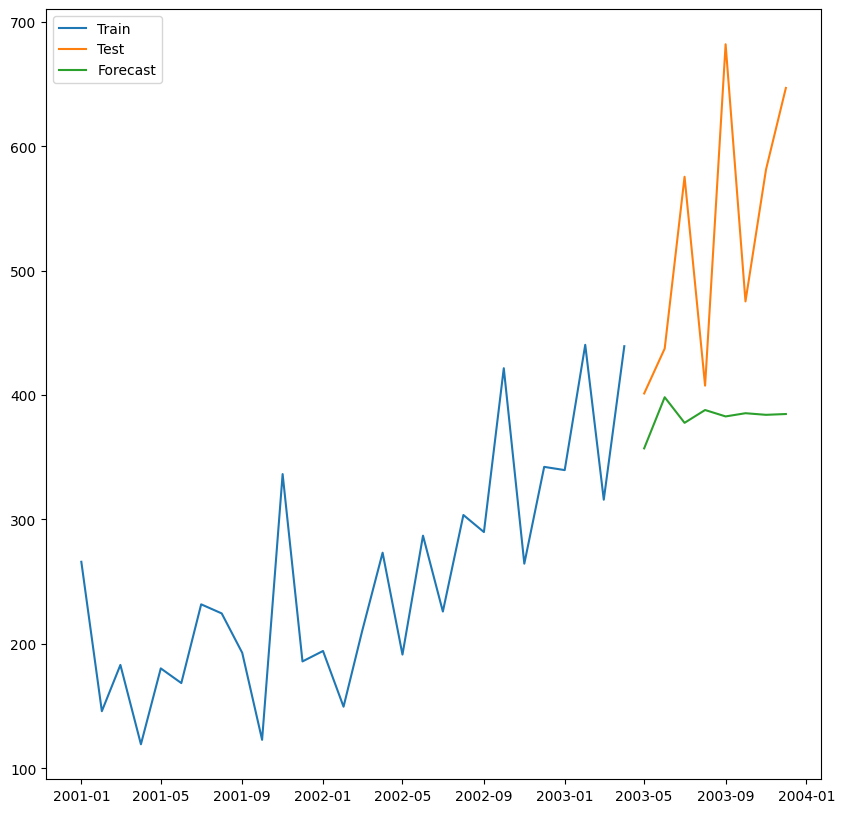

In [45]:
adj_arima(1,1,1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    357.166160
2003-06-01    398.277184
2003-07-01    377.699596
2003-08-01    387.999440
2003-09-01    382.843987
2003-10-01    385.424482
2003-11-01    384.132849
2003-12-01    384.779359
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 1, 1))
MSE :  31017.70213095809
RMSE :  176.1184321158864
MAE :  143.62211792796188


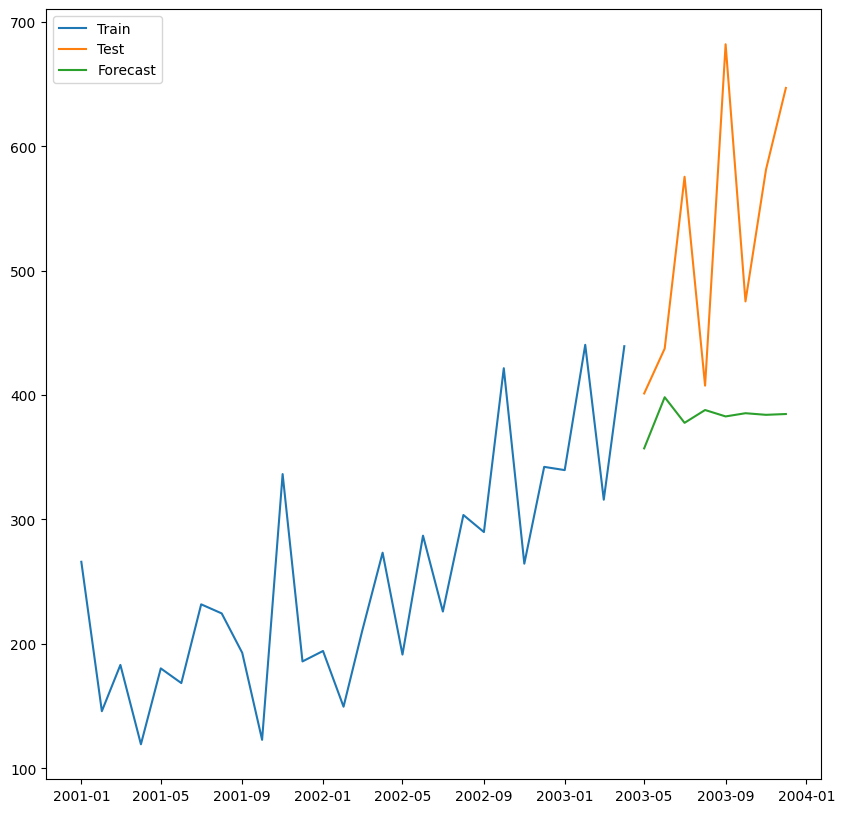

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    339.753099
2003-06-01    414.420497
2003-07-01    346.718693
2003-08-01    408.104711
2003-09-01    352.445290
2003-10-01    402.912339
2003-11-01    357.153275
2003-12-01    398.643554
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 1, 2))
MSE :  35297.06465093654
RMSE :  187.87513047483571
MAE :  148.51974547790977


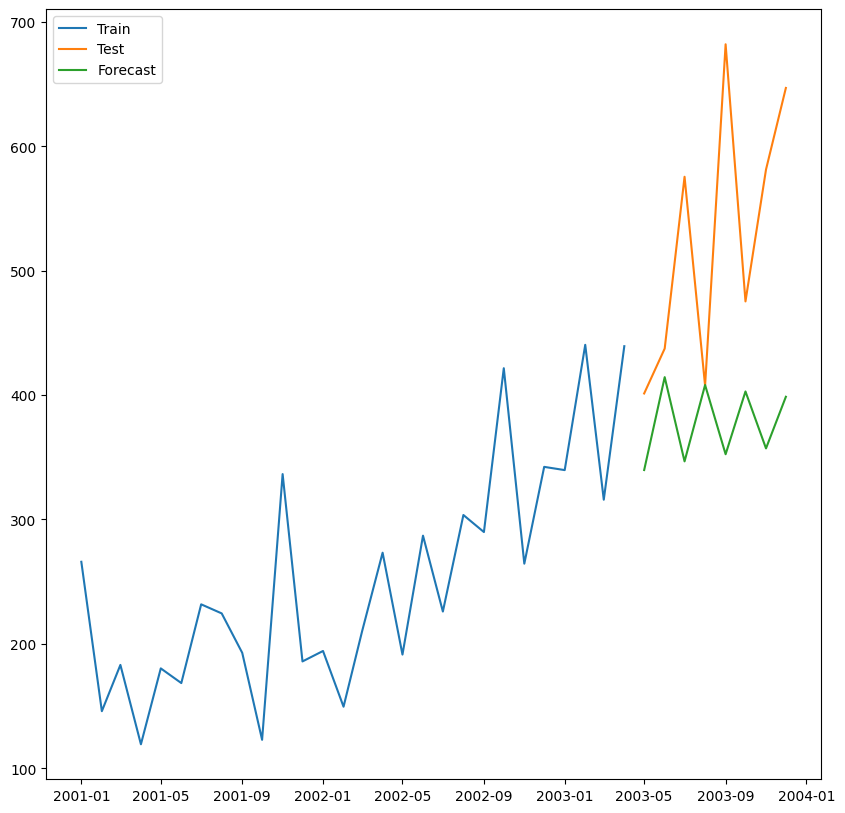

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    342.216387
2003-06-01    414.428059
2003-07-01    351.571443
2003-08-01    408.798926
2003-09-01    356.696459
2003-10-01    404.132882
2003-11-01    360.944635
2003-12-01    400.265152
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 1, 3))
MSE :  34304.55088297901
RMSE :  185.2148775962099
MAE :  146.33048860436077


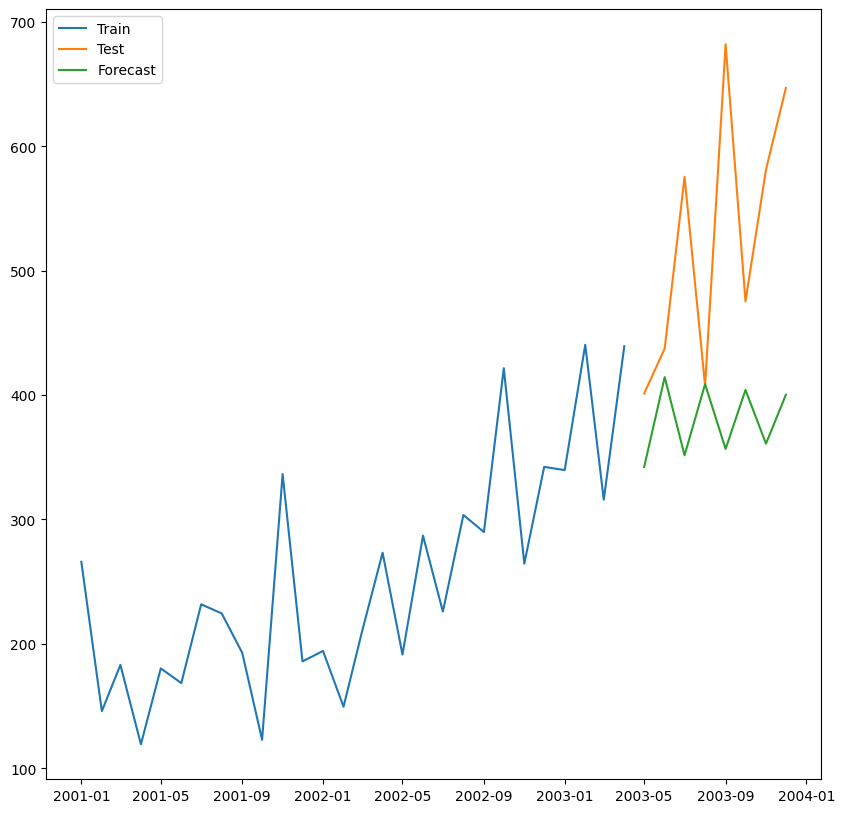

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    363.456827
2003-06-01    428.237502
2003-07-01    393.767265
2003-08-01    429.347334
2003-09-01    415.486594
2003-10-01    436.520685
2003-11-01    432.926352
2003-12-01    446.714515
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 2, 1))
MSE :  21204.7486615315
RMSE :  145.61850384319808
MAE :  113.04219924468777


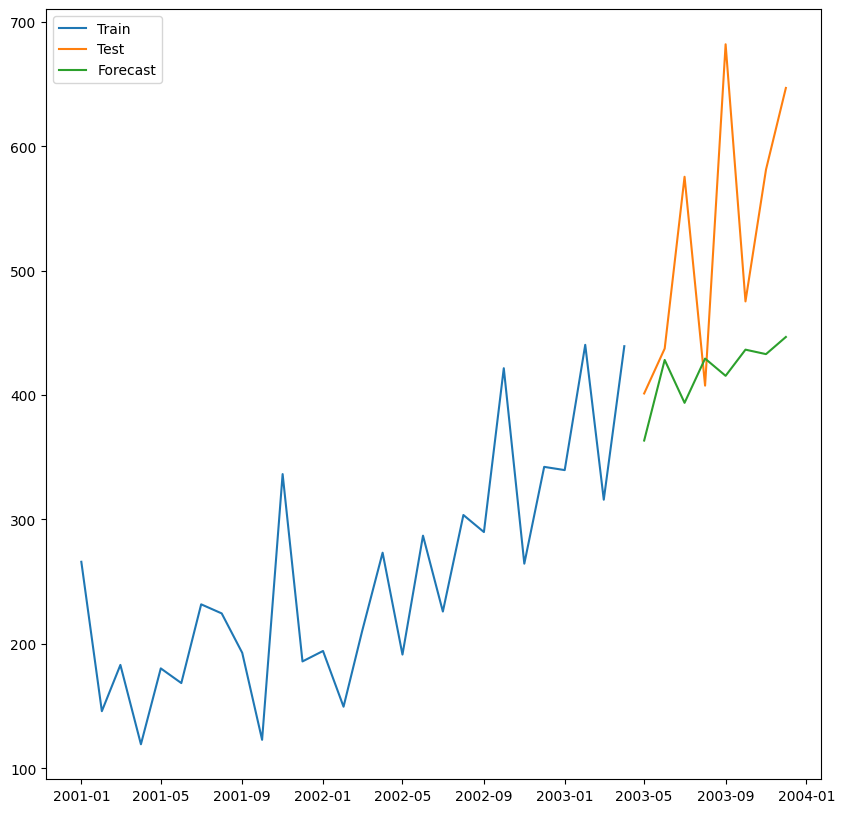

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    408.744984
2003-06-01    441.315110
2003-07-01    451.973344
2003-08-01    470.237597
2003-09-01    485.861662
2003-10-01    502.402184
2003-11-01    518.624588
2003-12-01    534.957416
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 2, 2))
MSE :  9364.648083652926
RMSE :  96.77111182399904
MAE :  74.42285814371013


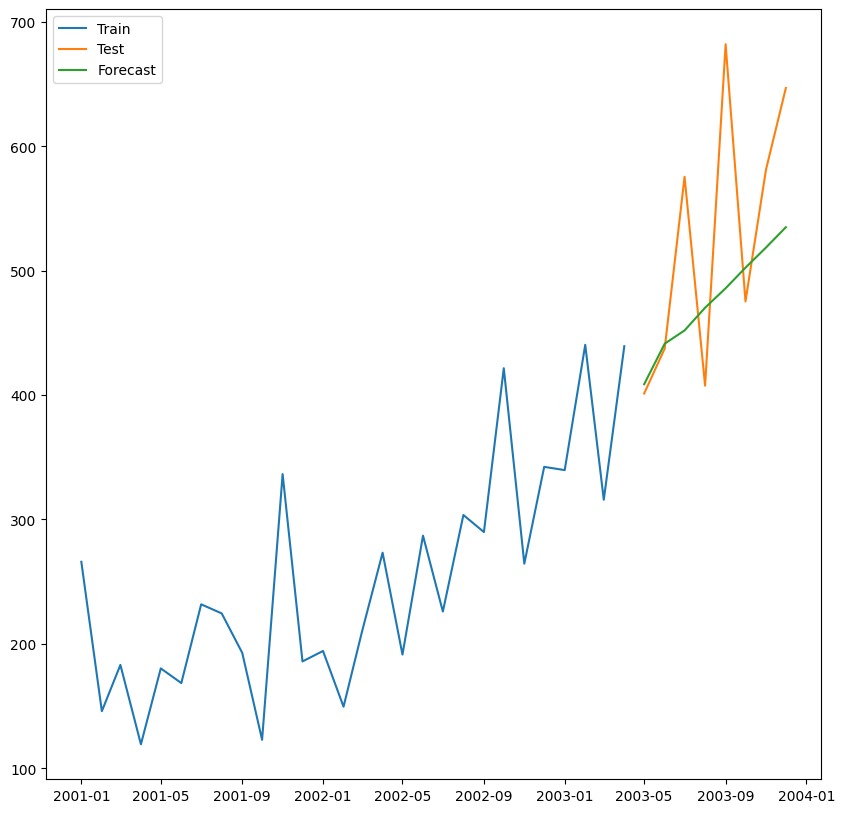

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    393.916743
2003-06-01    470.729395
2003-07-01    435.421299
2003-08-01    501.531248
2003-09-01    475.904207
2003-10-01    533.257225
2003-11-01    515.551206
2003-12-01    565.739318
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 2, 3))
MSE :  10794.369878530666
RMSE :  103.89595698837691
MAE :  85.71063697001003


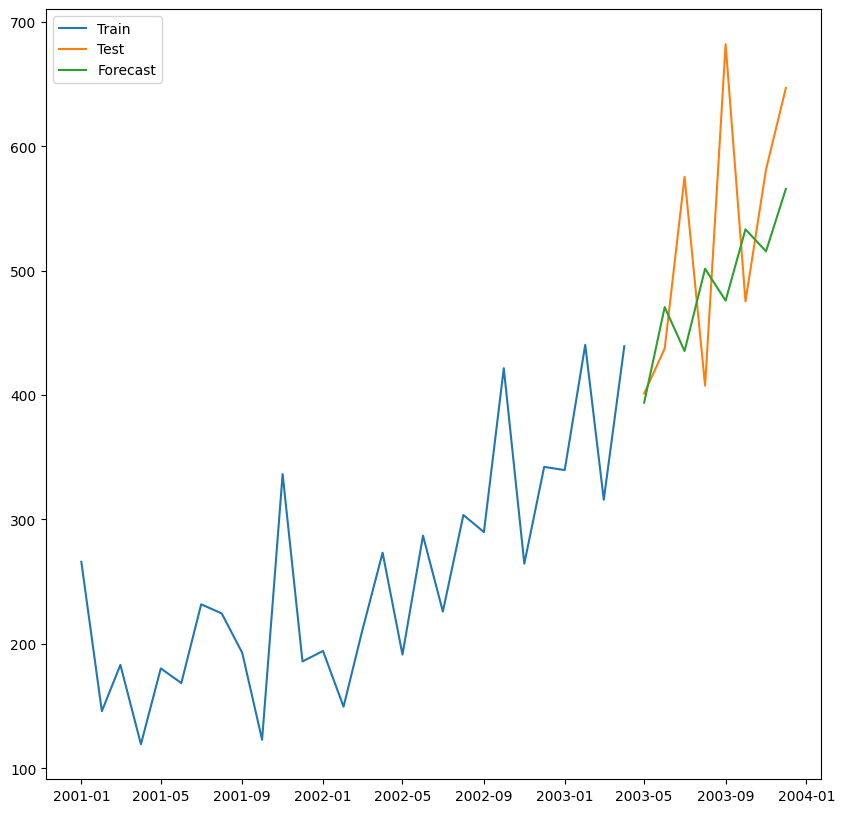

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    360.715223
2003-06-01    454.376914
2003-07-01    408.985310
2003-08-01    483.491377
2003-09-01    462.489865
2003-10-01    525.163044
2003-11-01    522.460296
2003-12-01    578.367586
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 3, 1))
MSE :  11781.47595957065
RMSE :  108.54250761600566
MAE :  87.08913177710562


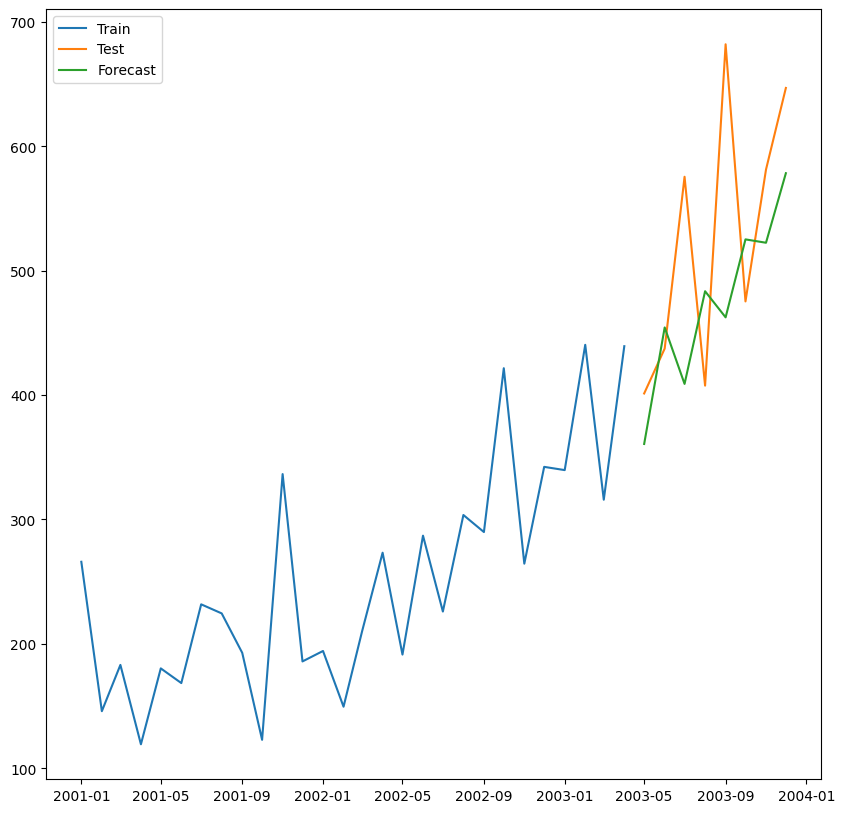

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    384.173649
2003-06-01    451.737939
2003-07-01    434.461267
2003-08-01    475.328149
2003-09-01    475.825533
2003-10-01    503.826653
2003-11-01    512.568406
2003-12-01    534.269498
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 3, 2))
MSE :  10713.657221930254
RMSE :  103.50679795032912
MAE :  82.03679849121782


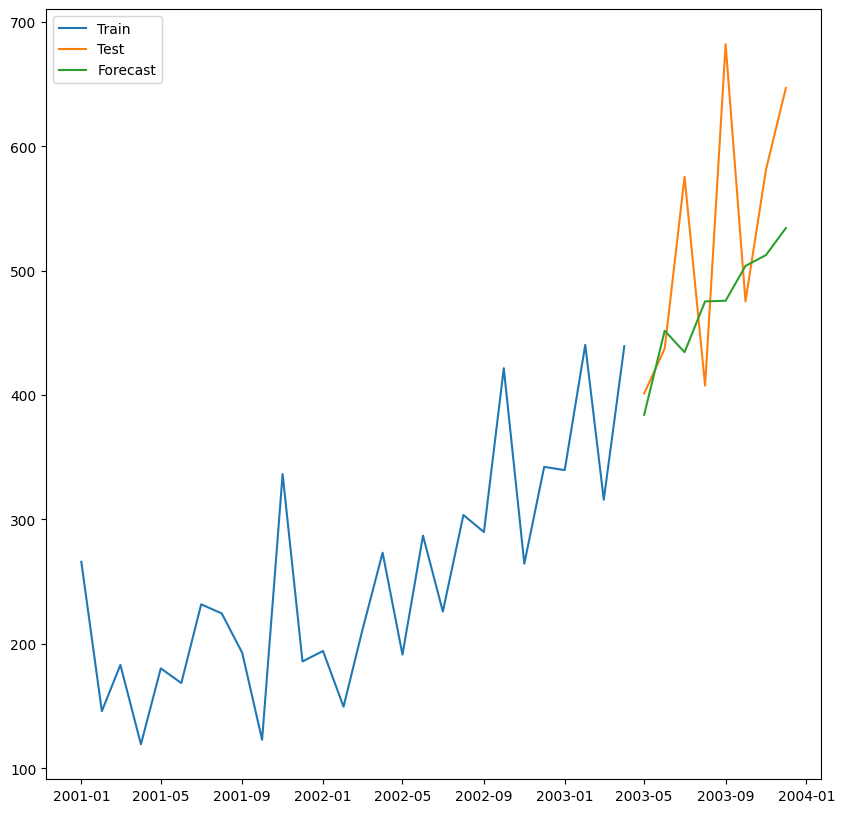

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    428.036995
2003-06-01    460.177639
2003-07-01    479.018570
2003-08-01    503.464044
2003-09-01    527.211597
2003-10-01    552.362398
2003-11-01    578.215943
2003-12-01    605.005770
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((1, 3, 3))
MSE :  6424.371239656948
RMSE :  80.15217551418644
MAE :  64.8361495480955


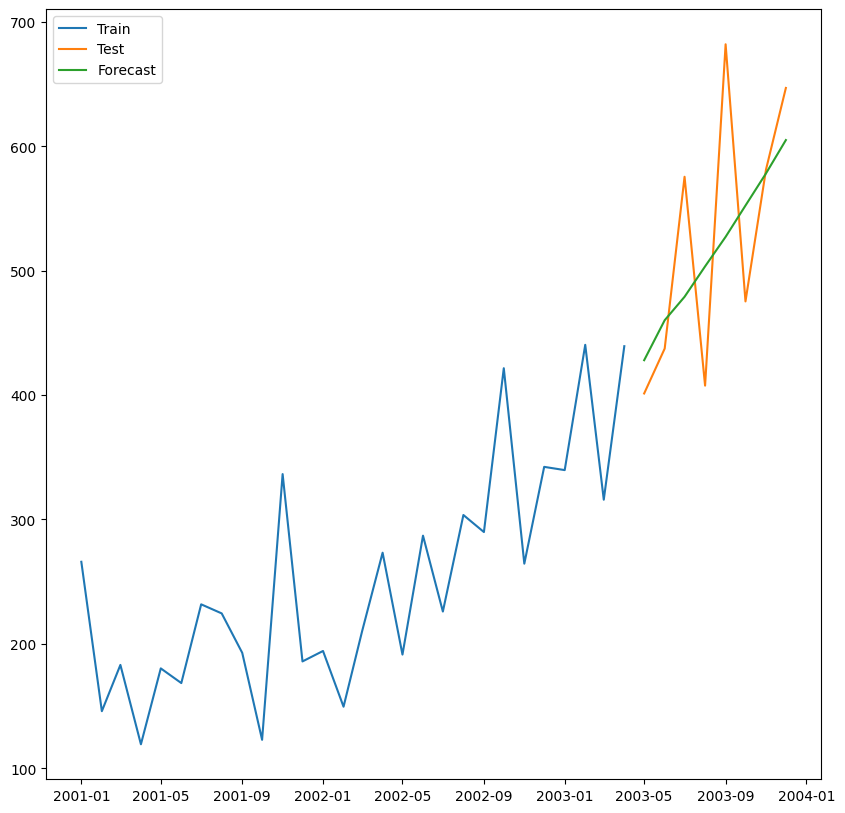

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    352.369772
2003-06-01    400.878749
2003-07-01    371.611374
2003-08-01    388.790288
2003-09-01    378.610242
2003-10-01    384.622804
2003-11-01    381.067539
2003-12-01    383.168942
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 1, 1))
MSE :  31945.89433645355
RMSE :  178.73414429384653
MAE :  145.77253626237277


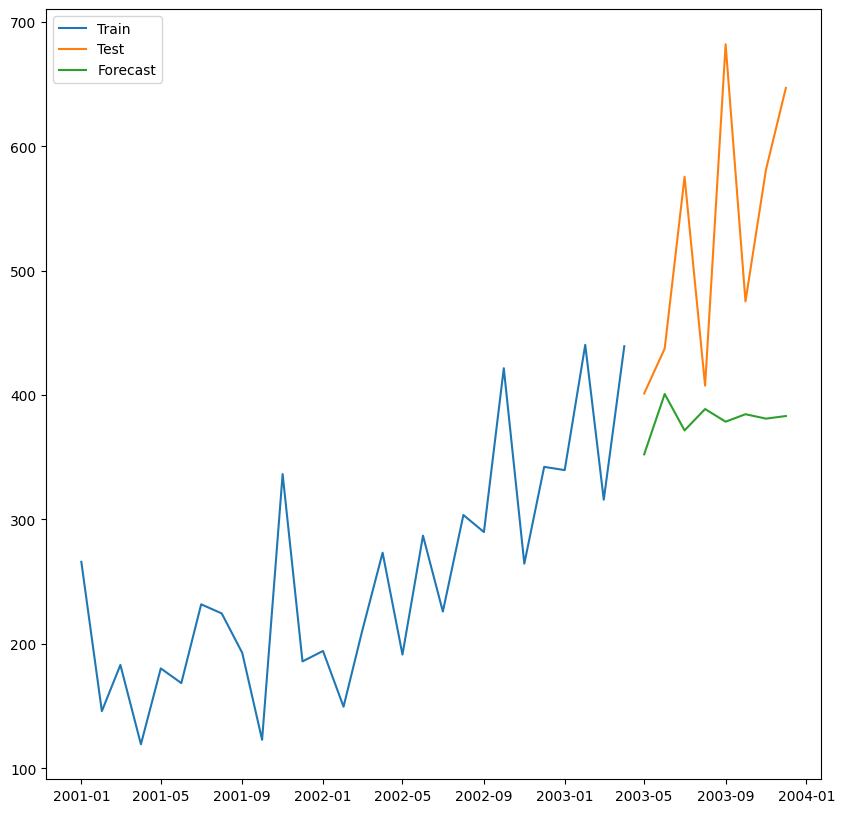

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    340.167037
2003-06-01    414.393029
2003-07-01    347.662555
2003-08-01    408.227880
2003-09-01    353.233557
2003-10-01    403.170359
2003-11-01    357.825922
2003-12-01    399.000326
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 1, 2))
MSE :  35107.728293306485
RMSE :  187.3705641057487
MAE :  148.10938687751835


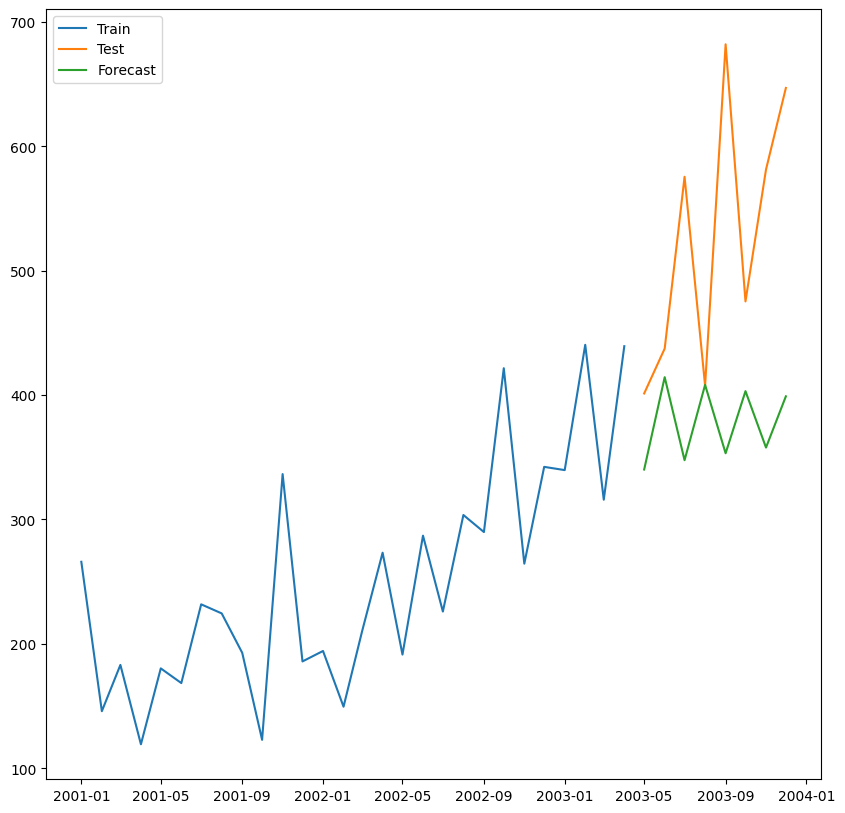

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    375.000827
2003-06-01    451.278835
2003-07-01    405.381675
2003-08-01    468.783414
2003-09-01    431.572410
2003-10-01    484.296092
2003-11-01    454.162005
2003-12-01    498.027256
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 1, 3))
MSE :  16836.24930564365
RMSE :  129.7545733515534
MAE :  100.86427102245561


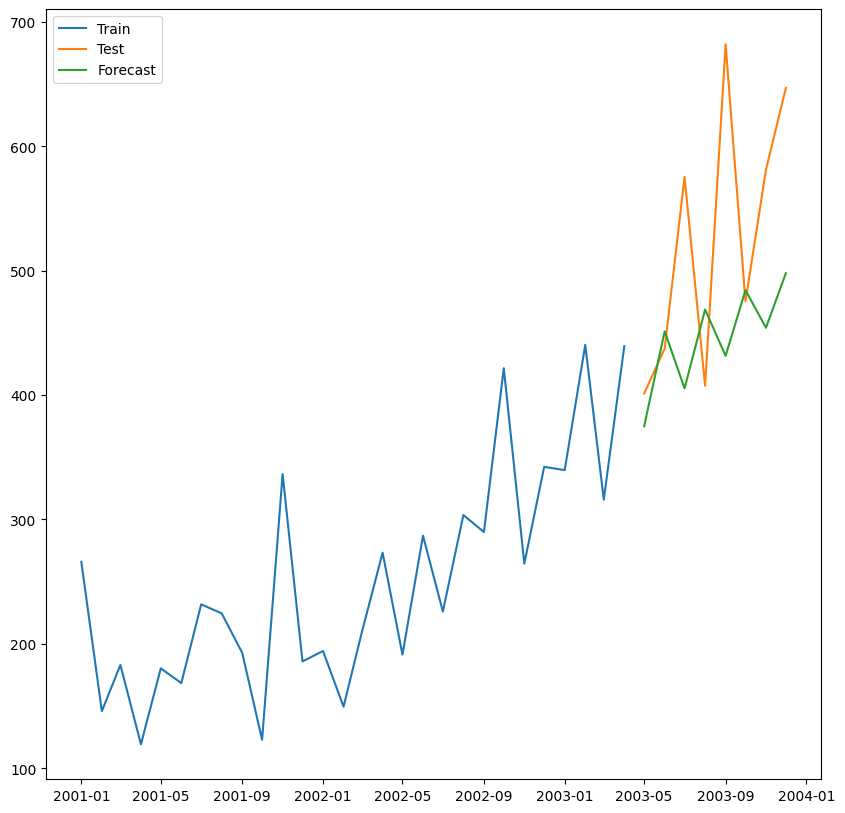

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    370.265984
2003-06-01    422.639069
2003-07-01    402.986825
2003-08-01    425.144972
2003-09-01    423.228859
2003-10-01    435.131675
2003-11-01    439.111710
2003-12-01    447.632008
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 2, 1))
MSE :  19968.85718187441
RMSE :  141.31120685166627
MAE :  109.53110543534457


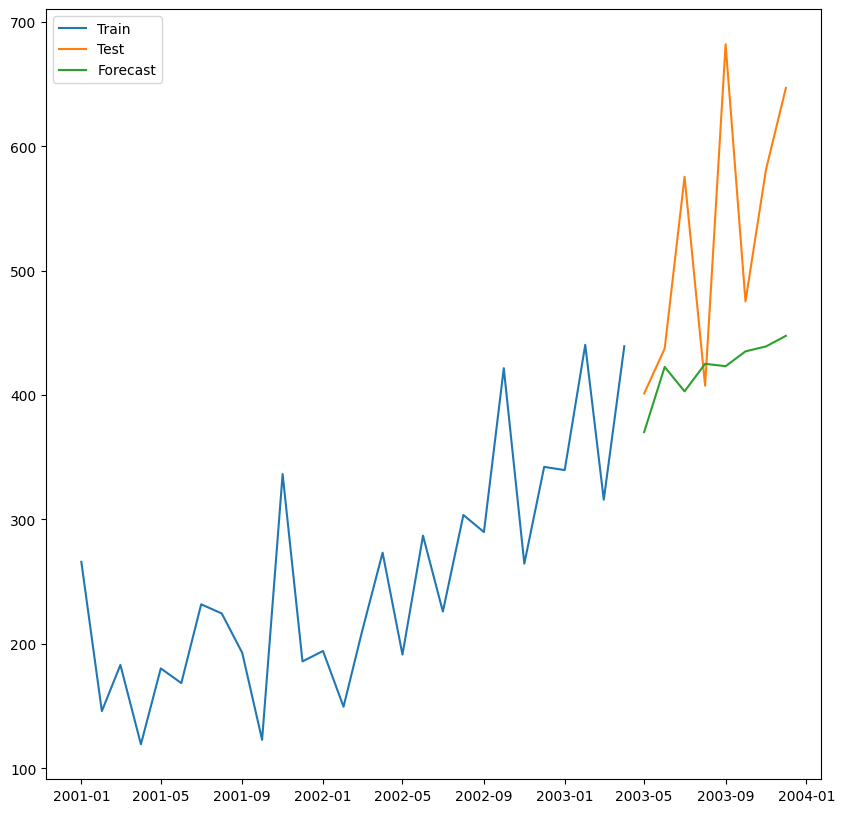

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    356.943546
2003-06-01    435.638121
2003-07-01    380.908675
2003-08-01    440.508964
2003-09-01    400.295158
2003-10-01    448.091308
2003-11-01    417.884582
2003-12-01    456.994885
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 2, 2))
MSE :  22973.2332172167
RMSE :  151.5692357215563
MAE :  116.98158619752346


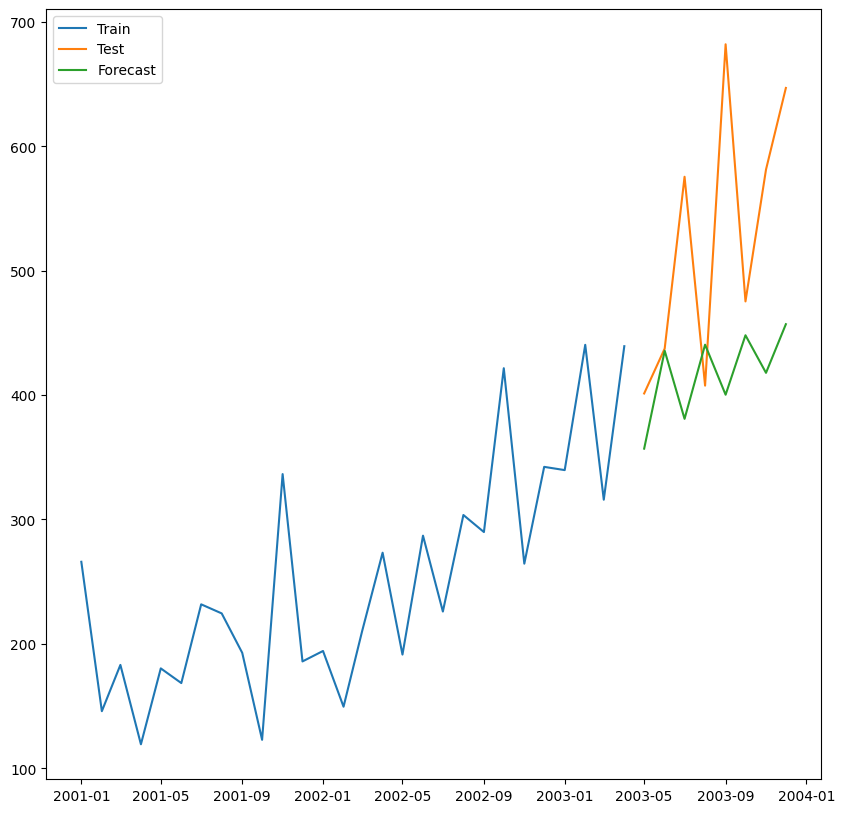

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    396.026558
2003-06-01    479.540722
2003-07-01    443.489638
2003-08-01    514.021152
2003-09-01    488.552238
2003-10-01    549.383973
2003-11-01    532.606500
2003-12-01    585.617357
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 2, 3))
MSE :  9949.117238802175
RMSE :  99.74526173609539
MAE :  82.91919453375712


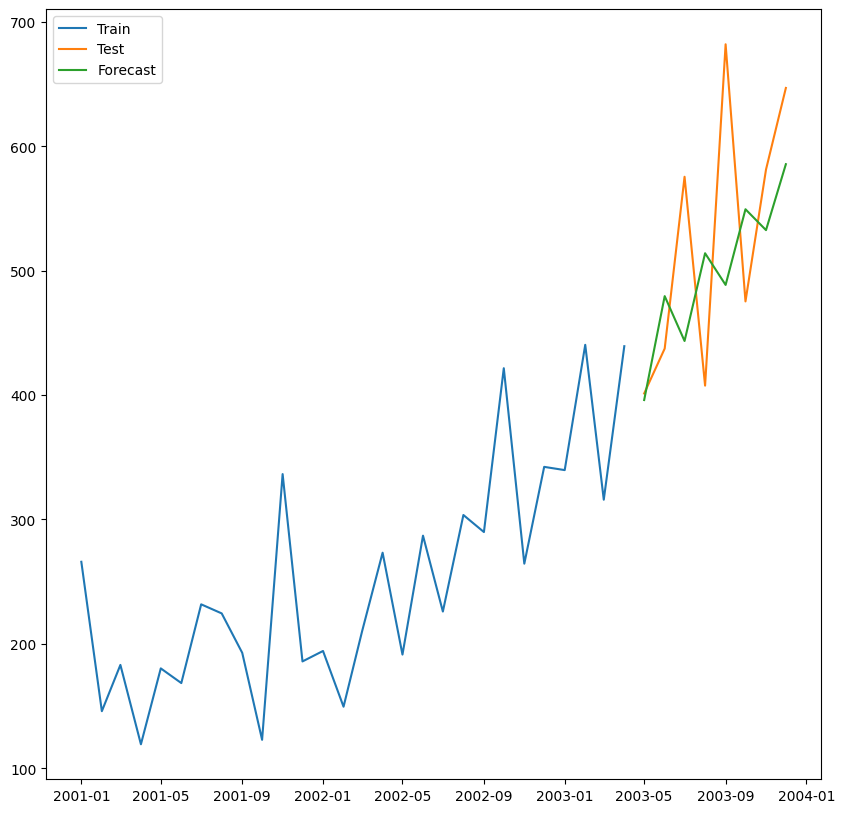

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    368.599517
2003-06-01    437.844561
2003-07-01    418.723632
2003-08-01    458.145947
2003-09-01    465.403207
2003-10-01    494.804479
2003-11-01    514.620169
2003-12-01    543.012432
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 3, 1))
MSE :  11342.082972229808
RMSE :  106.49921582917786
MAE :  80.8920038704552


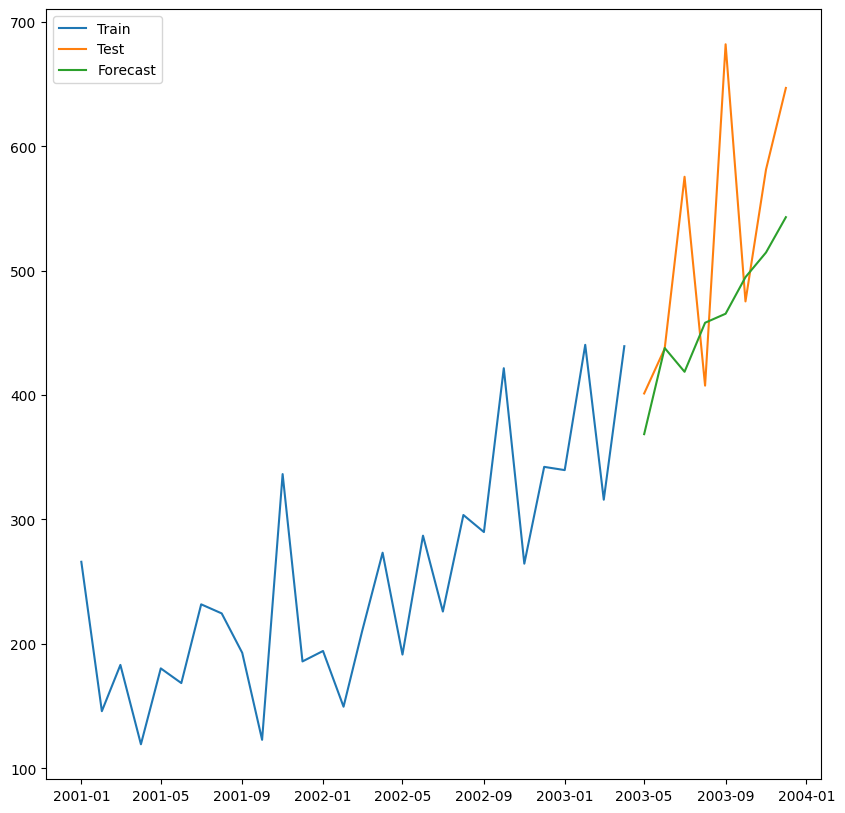

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    392.476282
2003-06-01    448.950521
2003-07-01    444.799571
2003-08-01    475.782733
2003-09-01    486.407810
2003-10-01    508.749458
2003-11-01    524.283900
2003-12-01    543.706106
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 3, 2))
MSE :  9402.218260956462
RMSE :  96.96503628090107
MAE :  76.06363030868322


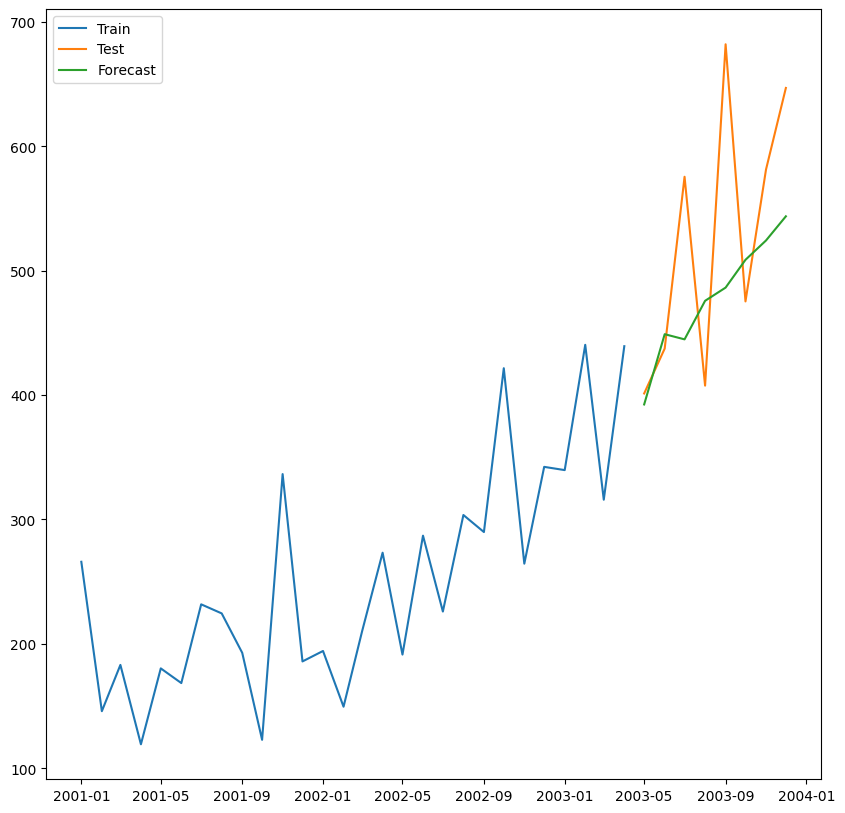

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    387.688667
2003-06-01    448.834869
2003-07-01    441.246514
2003-08-01    470.605470
2003-09-01    484.921264
2003-10-01    498.529449
2003-11-01    523.143372
2003-12-01    529.380836
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((2, 3, 3))
MSE :  9860.286883180224
RMSE :  99.29897725143107
MAE :  77.286141735442


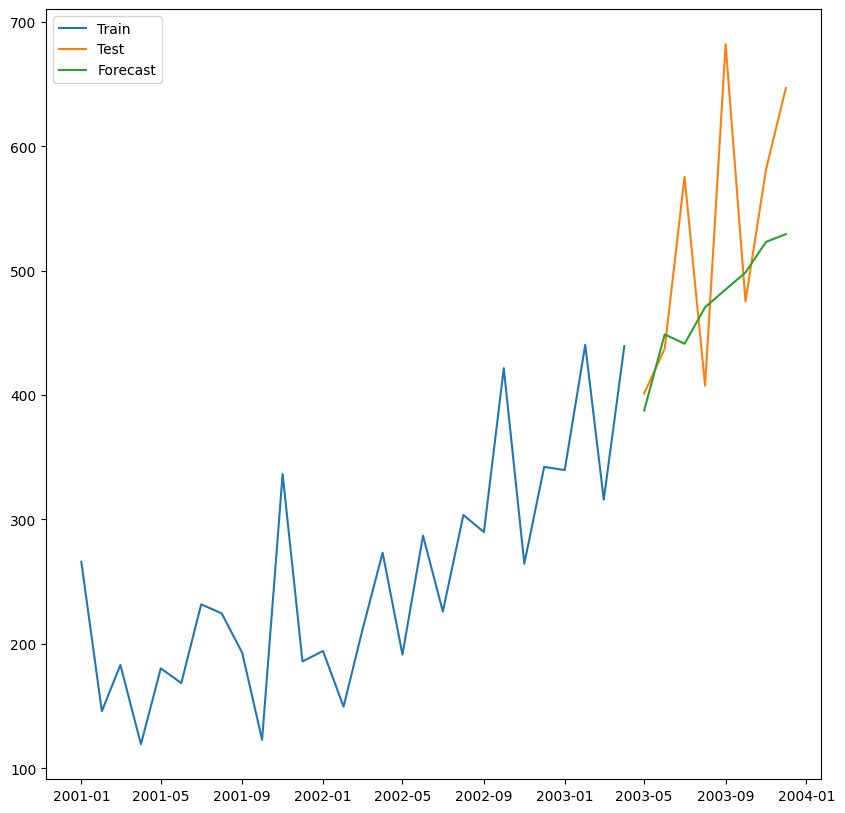

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    348.363549
2003-06-01    423.628612
2003-07-01    347.829546
2003-08-01    417.912870
2003-09-01    359.584915
2003-10-01    410.341850
2003-11-01    363.259097
2003-12-01    405.716137
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 1, 1))
MSE :  33601.83115602543
RMSE :  183.30802261773877
MAE :  143.9111454579624


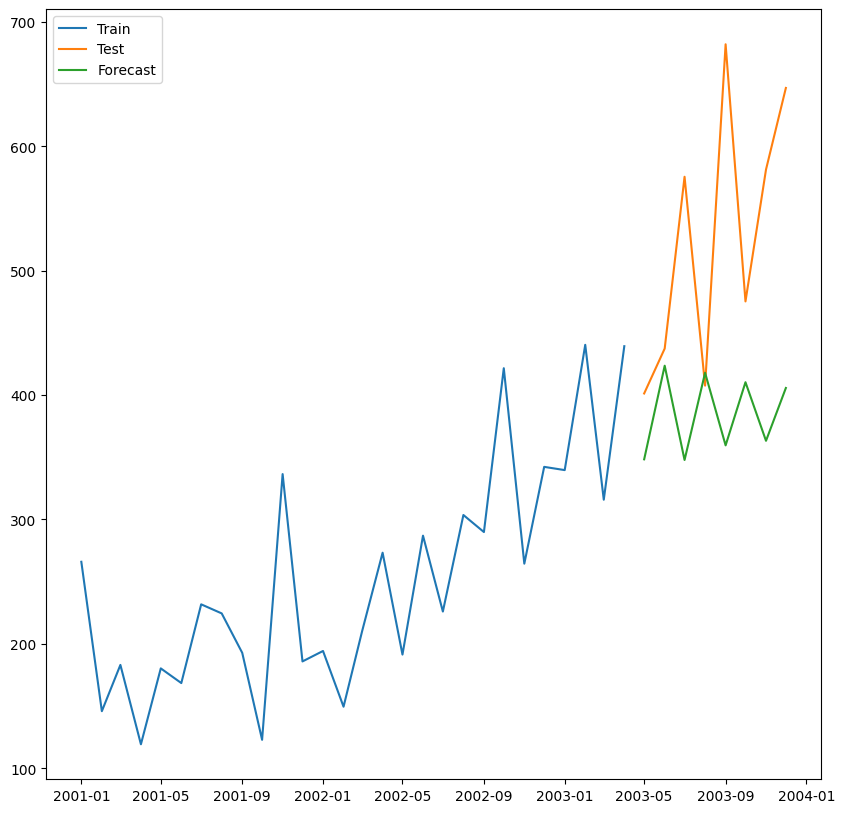

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    310.438652
2003-06-01    433.440754
2003-07-01    375.758390
2003-08-01    425.406824
2003-09-01    352.918020
2003-10-01    387.863899
2003-11-01    376.966742
2003-12-01    415.199345
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 1, 2))
MSE :  32482.818636497155
RMSE :  180.22990494503722
MAE :  145.61512789881544


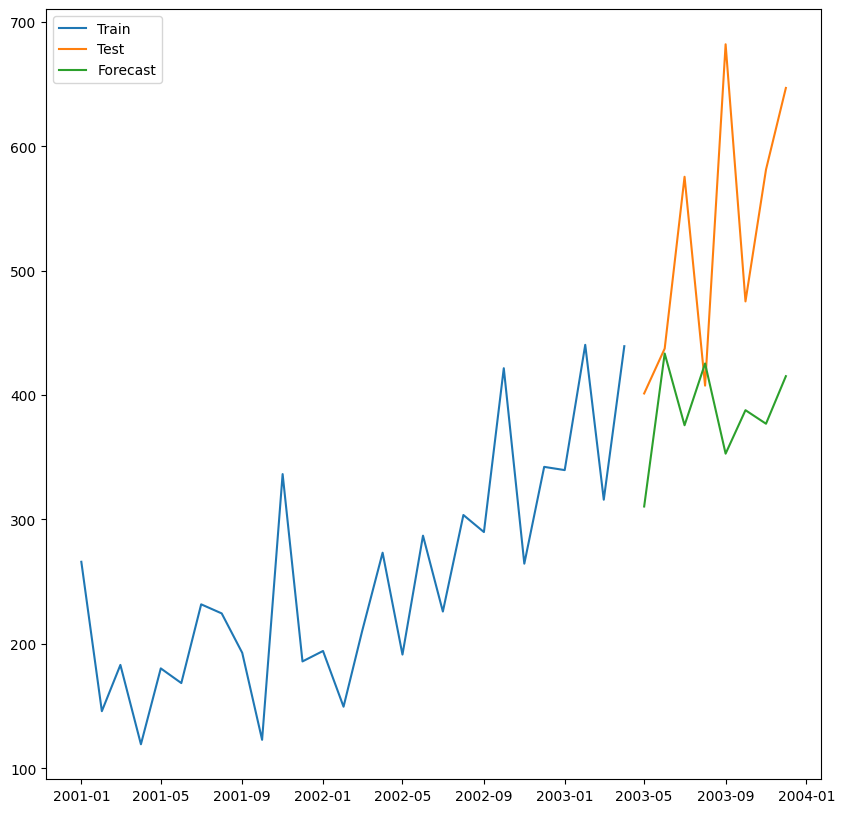

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    318.300732
2003-06-01    443.681184
2003-07-01    373.863189
2003-08-01    439.951732
2003-09-01    352.357116
2003-10-01    409.069110
2003-11-01    373.312973
2003-12-01    428.097707
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 1, 3))
MSE :  31602.047222445693
RMSE :  177.76964651606215
MAE :  143.24151094302903


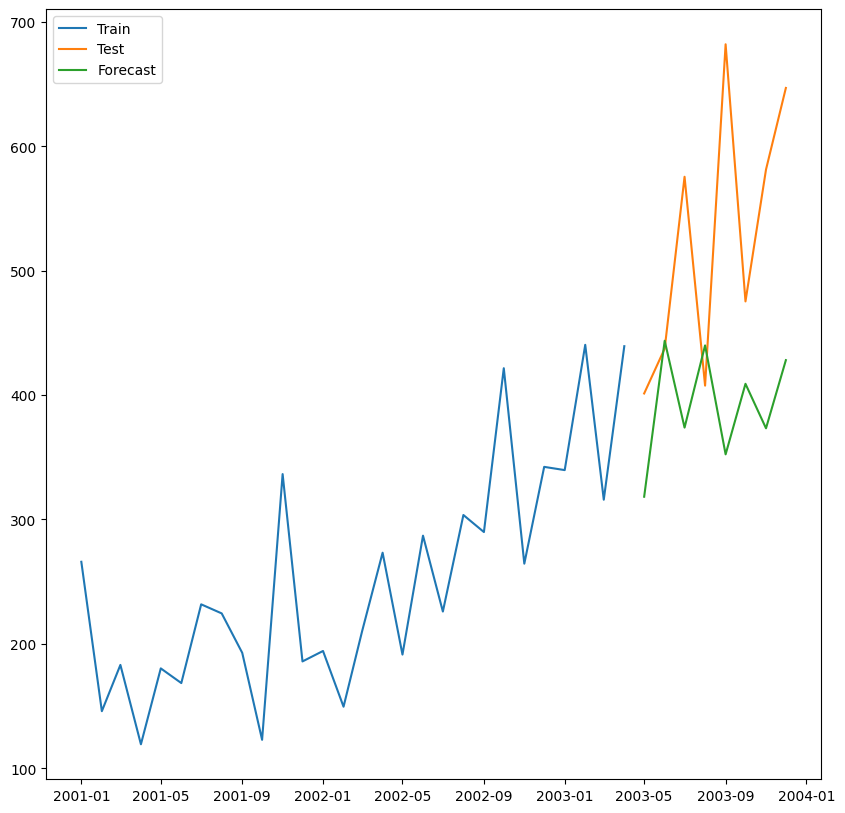

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    380.365207
2003-06-01    460.329553
2003-07-01    391.748416
2003-08-01    473.209923
2003-09-01    431.063217
2003-10-01    491.680927
2003-11-01    452.675833
2003-12-01    509.262711
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 2, 1))
MSE :  17219.892526100397
RMSE :  131.2245881155677
MAE :  103.35062742235283


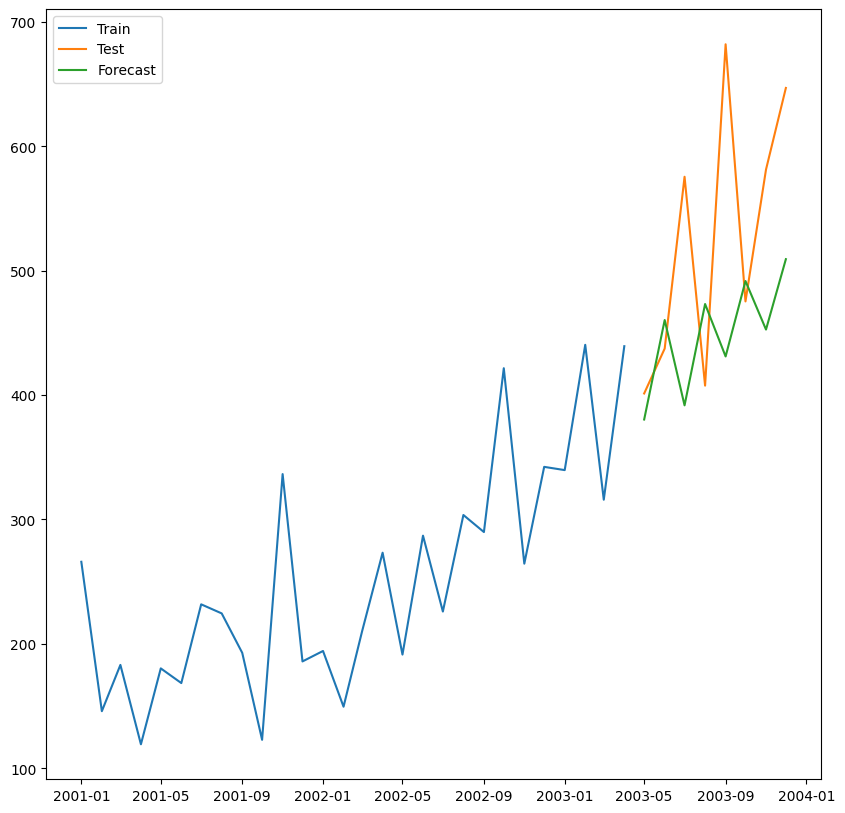

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forcasted values : 
 2003-05-01    377.545221
2003-06-01    465.332386
2003-07-01    402.416093
2003-08-01    474.628480
2003-09-01    440.607533
2003-10-01    499.639697
2003-11-01    470.658717
2003-12-01    517.317351
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 2, 2))
MSE :  15461.407952065652
RMSE :  124.34390999186752
MAE :  99.71945577592312


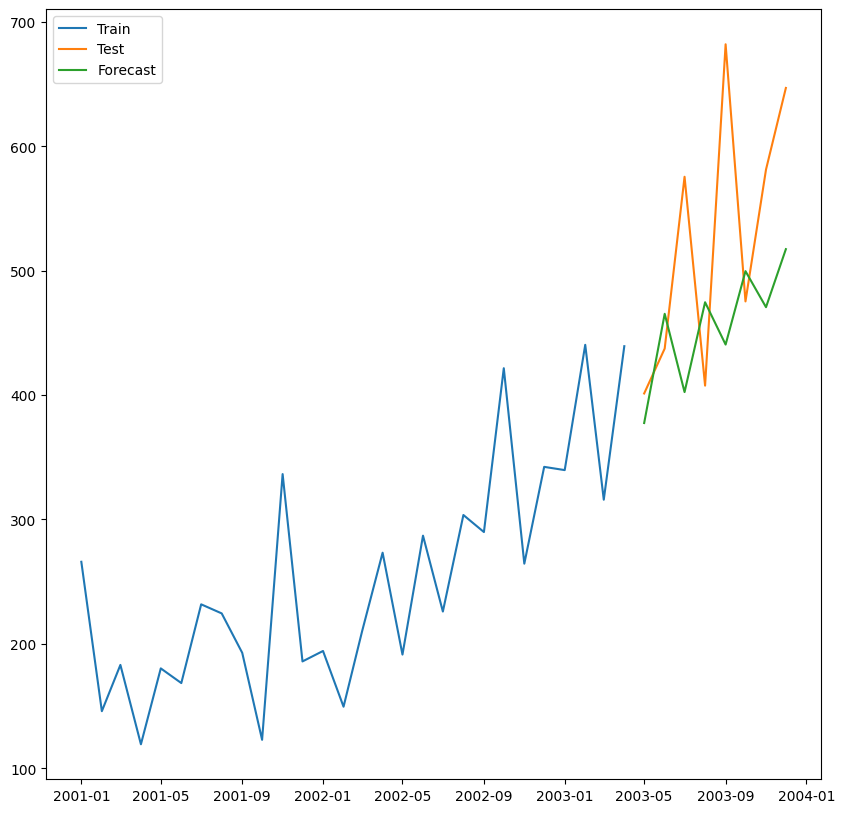

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    325.178816
2003-06-01    461.409987
2003-07-01    406.618318
2003-08-01    471.795865
2003-09-01    401.809780
2003-10-01    459.686138
2003-11-01    451.539772
2003-12-01    505.527924
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 2, 3))
MSE :  19323.397318142415
RMSE :  139.00862317907624
MAE :  112.51813802505578


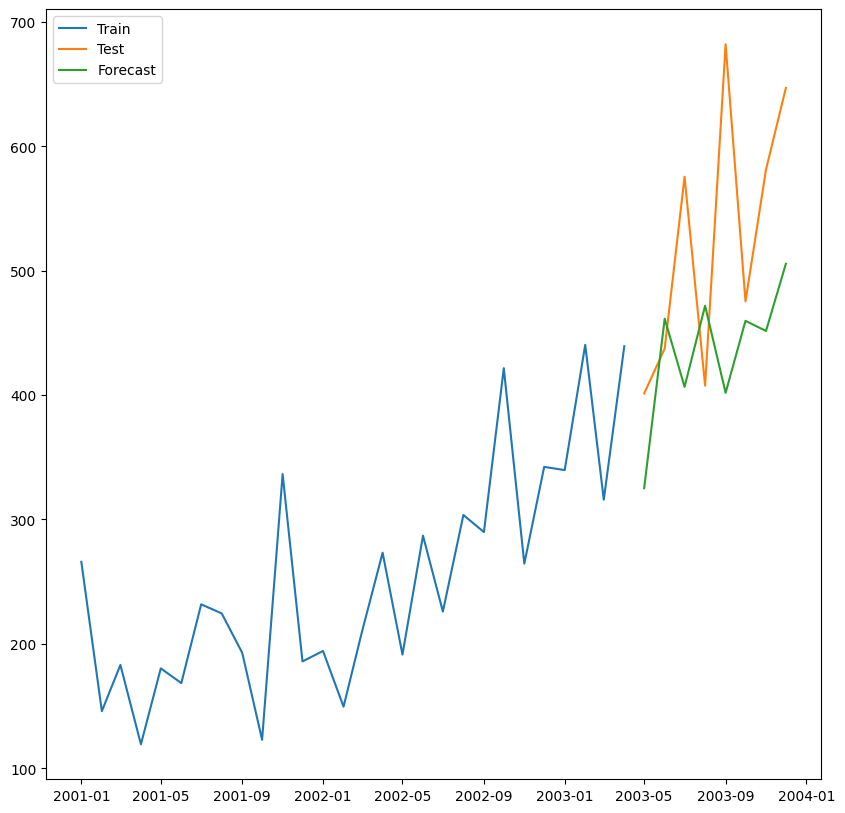

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    402.834444
2003-06-01    475.097328
2003-07-01    424.838735
2003-08-01    524.825742
2003-09-01    492.893295
2003-10-01    565.663246
2003-11-01    549.297917
2003-12-01    629.713765
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 3, 1))
MSE :  10388.812061128741
RMSE :  101.92552212831063
MAE :  79.47213095486387


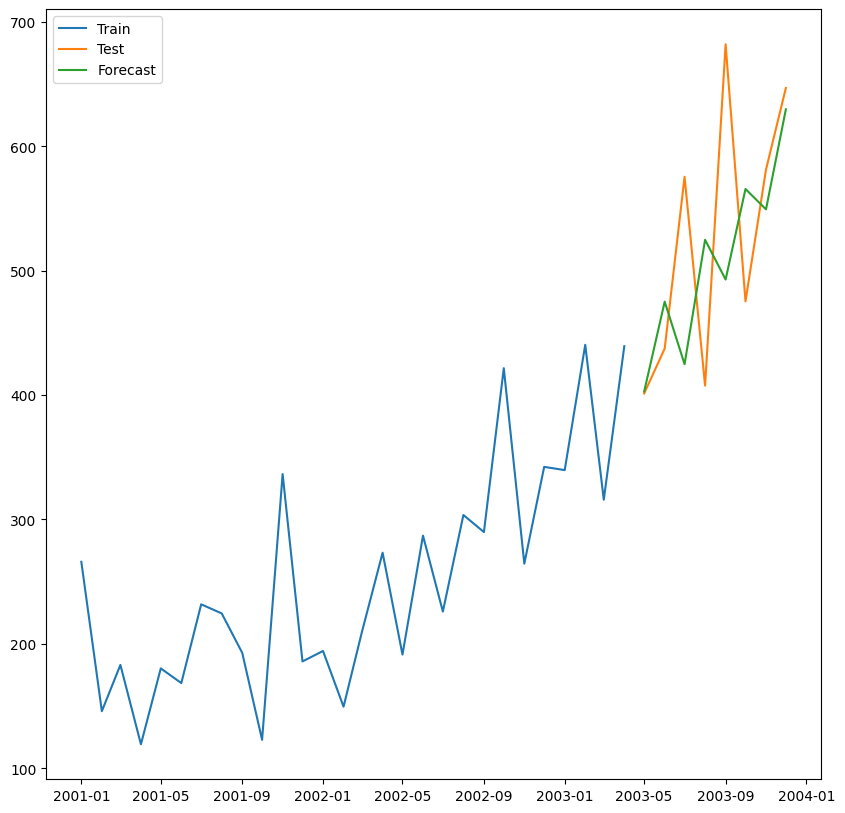

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    403.458466
2003-06-01    487.343784
2003-07-01    429.910361
2003-08-01    515.883533
2003-09-01    492.535816
2003-10-01    560.645659
2003-11-01    537.202399
2003-12-01    602.506657
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 3, 2))
MSE :  10314.57911873671
RMSE :  101.56071641504263
MAE :  83.65952614661106


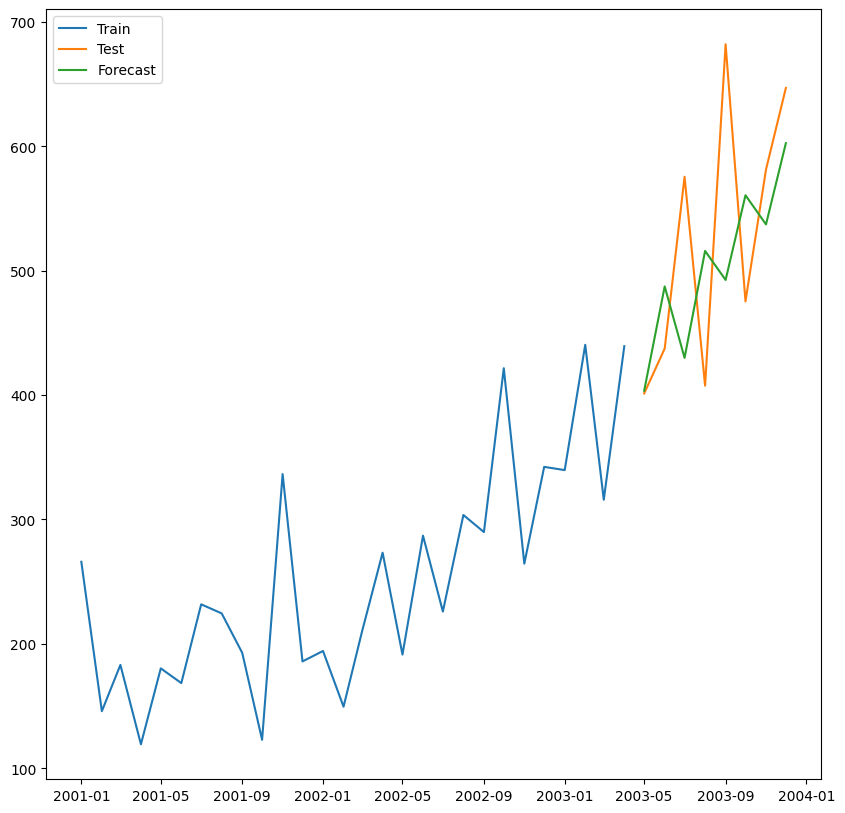

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forcasted values : 
 2003-05-01    399.977304
2003-06-01    487.750873
2003-07-01    433.279110
2003-08-01    510.283385
2003-09-01    491.826323
2003-10-01    558.142472
2003-11-01    541.055074
2003-12-01    597.404097
Freq: MS, Name: predicted_mean, dtype: float64
ARIMA((3, 3, 3))
MSE :  10050.752493335249
RMSE :  100.25344130420287
MAE :  82.41685264196997


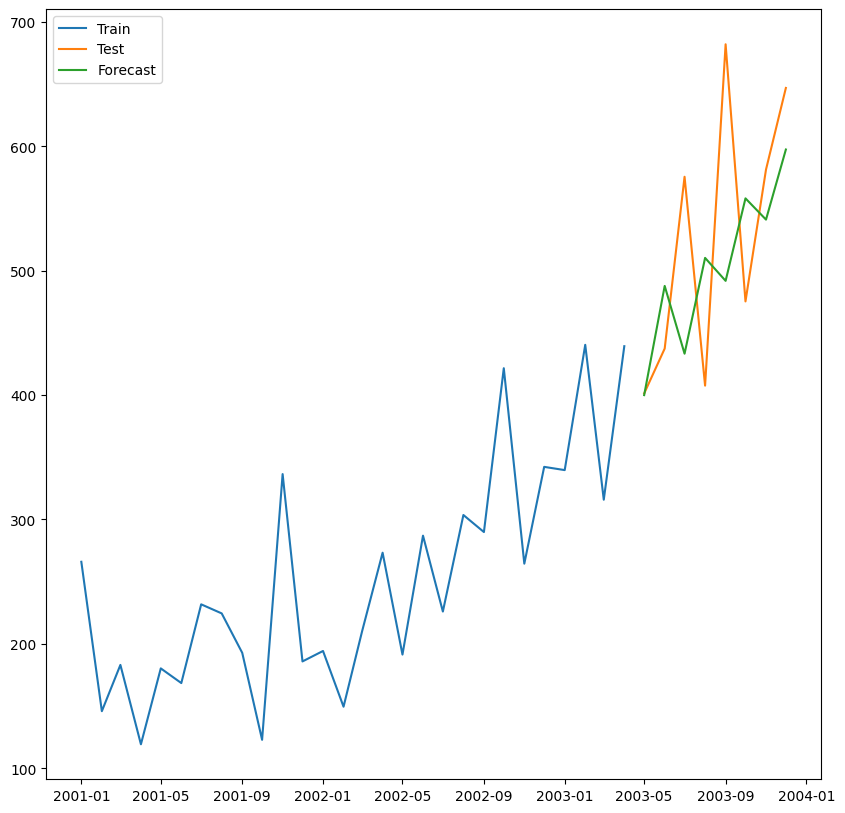

In [46]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            adj_arima(i,j,k)

# Summary

1.Model Identification: Use plots and summary statistics to
identify trends, seasonality, and autoregression elements to get an idea of the amount of differencing and the size of the lag that will be required.

2.Parameter Estimation: Use a fitting procedure to find the coefficients of the regression model.

3.Model Checking: Use plots and statistical tests of the residual errors to determine the amount and type of temporal structure not captured by the model.